<a href="https://colab.research.google.com/github/iav2002/Fake-Image-Detector/blob/main/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



![Image1](https://drive.google.com/uc?export=donwload&id=1sdFLrm5xMuK_Yu16itbJc1t63b9oC_Ui)

# 1. Exploratory Data Analysis (EDA)
In this section we will try to get helpful insights about the data to make sure we are using the right model and what attributes of the data we need to keep in mind at the moment of transforming it to ensure a smooth training and learning from the chosen algorithm.

The questions we aim to answer about the data are the following:
1. Are the image counts consistent across all folders?
2. Are the image dimensions consistent across the dataset?
3. Do the file types and format match across all files?
4. Do we have any specific characteristic in the images generated by a specific AI-generator?

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1.1. Are the image counts consistent across all folders?

We want to identify if a the fake images are distributed equally across the AI-generator softwares.

Image Counts by Folder:
SD_dataset: Real = 2675, Fake = 2675
DALLE_dataset: Real = 2150, Fake = 2150
IMAGEN_dataset: Real = 1175, Fake = 1175
GLIDE_dataset: Real = 500, Fake = 500


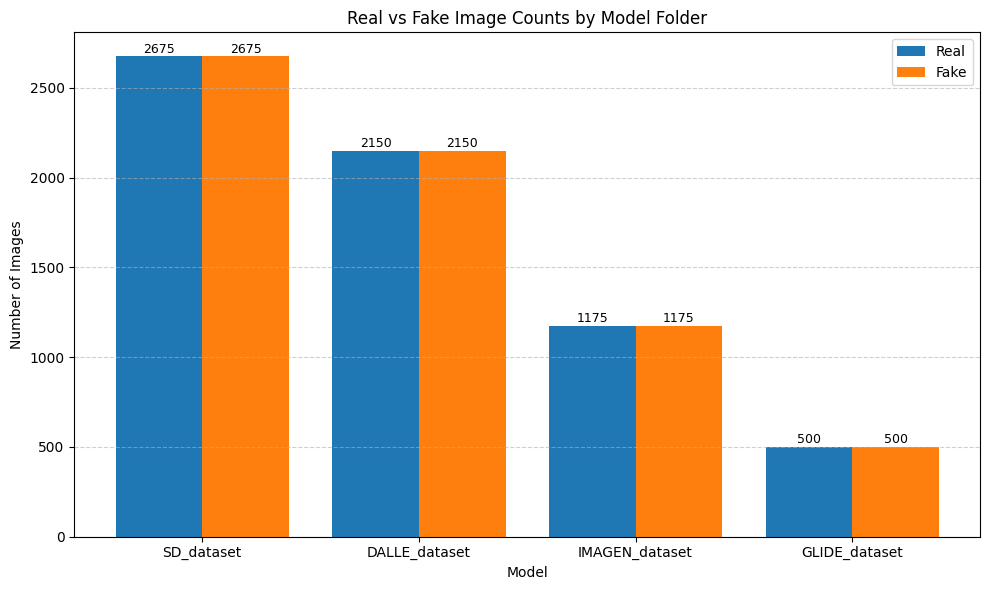

In [ ]:
import os
from PIL import Image
import random
from collections import Counter
import matplotlib.pyplot as plt

root_dir = 'drive/MyDrive/DeepGuardDB_v1' # root directory

image_counts = {} # Dictionary to store counts

model_folders = [f for f in os.listdir(root_dir)# Exclude non-model folders (Specifically the JSON_files)
                 if os.path.isdir(os.path.join(root_dir, f)) and f.lower() != 'json_files']

# Traverse each model folder
for model_folder in model_folders:
    model_path = os.path.join(root_dir, model_folder) #Builds the full path to the current model folder
    image_counts[model_folder] = {} # Nested dictionary to store real and fake counts in each model folder

    for category in ['real', 'fake']:
        category_path = os.path.join(model_path, category)
        if os.path.exists(category_path):
            # Count only the images within these subfolders as we want to filter out anything which is not an image
            count = len([f for f in os.listdir(category_path) if os.path.isfile(os.path.join(category_path, f))])
            image_counts[model_folder][category] = count
        else:
            image_counts[model_folder][category] = 0

print("Image Counts by Folder:") # Print results
for model, counts in image_counts.items():
    print(f"{model}: Real = {counts['real']}, Fake = {counts['fake']}")

labels = list(image_counts.keys()) # Prepare for plotting
real_counts = [image_counts[model]['real'] for model in labels]
fake_counts = [image_counts[model]['fake'] for model in labels]

# Plotting
x = range(len(labels))
plt.figure(figsize=(10,6))
bars_real = plt.bar(x, real_counts, width=0.4, label='Real', align='center')
bars_fake = plt.bar([i + 0.4 for i in x], fake_counts, width=0.4, label='Fake', align='center')

# Add labels on top of each bar
for bar in bars_real + bars_fake:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, str(yval), ha='center', va='bottom', fontsize=9)

plt.xlabel('Model')
plt.ylabel('Number of Images')
plt.title('Real vs Fake Image Counts by Model Folder')
plt.xticks([i + 0.2 for i in x], labels)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## 1.2. Are the image dimensions consistent across the dataset?
Checking that all images have consistent dimensions is essential because deep learning models require fixed-size inputs. If images vary in size, it can cause errors during training or lead to inconsistent feature extraction. Ensuring uniform image size helps maintain data quality and prevents issues related to the Garbage In, Garbage Out (GIGO) principle.

Unique image dimensions and their counts:
(512, 512): 12020 images
(1024, 1024): 779 images
(1536, 1536): 175 images
(500, 375): 4 images
(612, 612): 2 images
(640, 427): 2 images
(4000, 4000): 1 images
(512, 511): 1 images
(510, 512): 1 images
(640, 480): 1 images
(500, 336): 1 images
(545, 640): 1 images
(640, 408): 1 images
(427, 640): 1 images
(640, 342): 1 images
(500, 333): 1 images
(640, 425): 1 images
(640, 588): 1 images
(640, 359): 1 images
(640, 378): 1 images
(425, 640): 1 images
(640, 460): 1 images
(640, 338): 1 images
(64, 64): 1 images


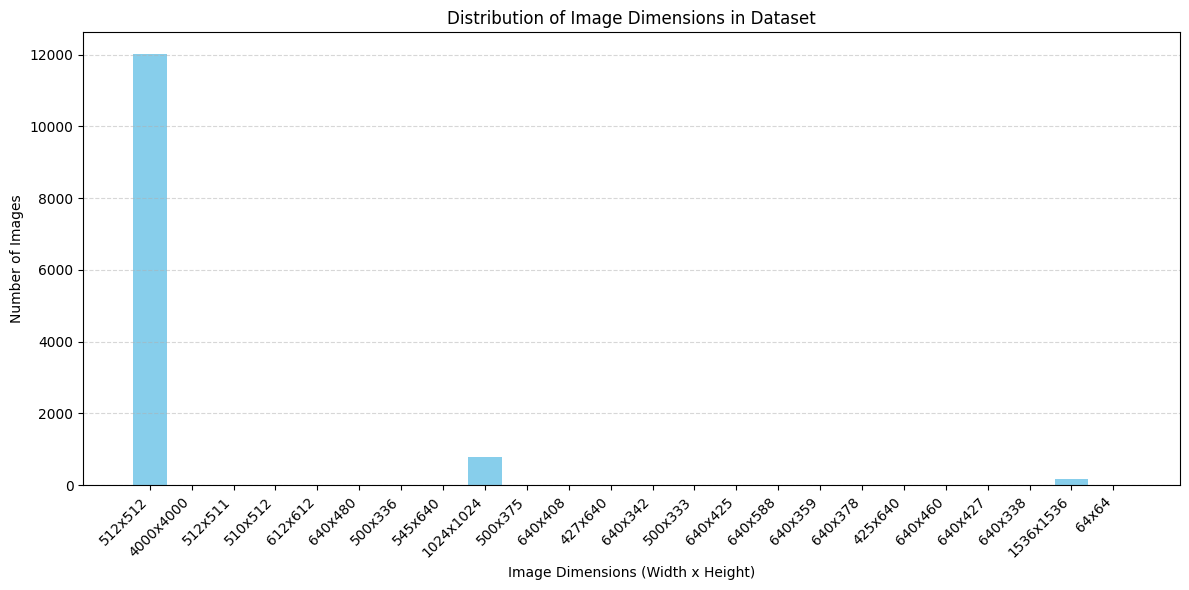

In [ ]:
dimensions = [] # Store dimensions

# List of model folders to check (excluding the JSON folder)
model_folders = [f for f in os.listdir(root_dir)
                 if os.path.isdir(os.path.join(root_dir, f)) and f.lower() != 'json_files']

# Traverse through model folders
for model_folder in model_folders:
    model_path = os.path.join(root_dir, model_folder)

    for category in ['real', 'fake']:
        category_path = os.path.join(model_path, category)
        if os.path.exists(category_path):
            for filename in os.listdir(category_path):
                file_path = os.path.join(category_path, filename)
                try:
                    with Image.open(file_path) as img:
                        dimensions.append(img.size)  # (width, height)
                except Exception as e:
                    print(f"Error reading {file_path}: {e}")

# Count occurrences
dimension_counts = Counter(dimensions)

# Display results
print("Unique image dimensions and their counts:")
for dim, count in dimension_counts.most_common():
    print(f"{dim}: {count} images")

# Prepare for plotting
labels = [f"{w}x{h}" for (w, h) in dimension_counts.keys()]
counts = list(dimension_counts.values())

# Plotting
plt.figure(figsize=(12,6))
bars = plt.bar(labels, counts, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Image Dimensions (Width x Height)')
plt.ylabel('Number of Images')
plt.title('Distribution of Image Dimensions in Dataset')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


## 1.3. Do the file types and format match across all files?
Some models require specific format of data to be trained.
Ensuring consistency in image formats (e.g., JPEG, PNG) can avoid compatibility issues during preprocessing.

File type distribution:
.jpg: 10435 files
.webp: 848 files
.png: 1217 files
.jpeg: 500 files


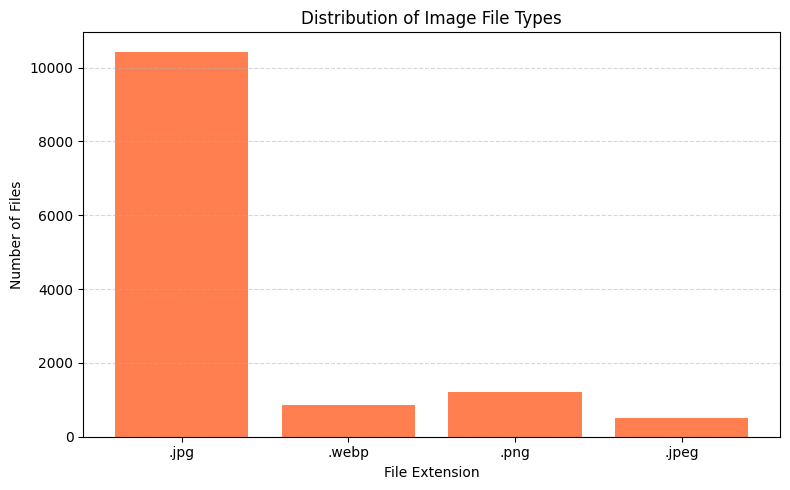

In [ ]:
# Store file extensions
file_types = []

# Traverse model folders and subfolders
for model_folder in os.listdir(root_dir):
    model_path = os.path.join(root_dir, model_folder)
    if os.path.isdir(model_path):
        for category in ['real', 'fake']:
            category_path = os.path.join(model_path, category)
            if os.path.exists(category_path):
                for filename in os.listdir(category_path):
                    ext = os.path.splitext(filename)[1].lower()
                    if ext:
                        file_types.append(ext)

# Count file types
file_type_counts = Counter(file_types)

# Display results
print("File type distribution:")
for ext, count in file_type_counts.items():
    print(f"{ext}: {count} files")

# Plotting
plt.figure(figsize=(8,5))
plt.bar(file_type_counts.keys(), file_type_counts.values(), color='coral')
plt.xlabel('File Extension')
plt.ylabel('Number of Files')
plt.title('Distribution of Image File Types')
plt.grid(axis='y', linestyle='--', alpha=0.5)


plt.tight_layout()
plt.show()

## 1.4.Do we have any specific characteristic in the images generated by a specific AI-generator?
As printing `dataset.head()` when working with structure data, let's see a few samples of each of the folders to get a better understanding of what kind of images we are working with. (Are these coloured? Are they in greyscale?)

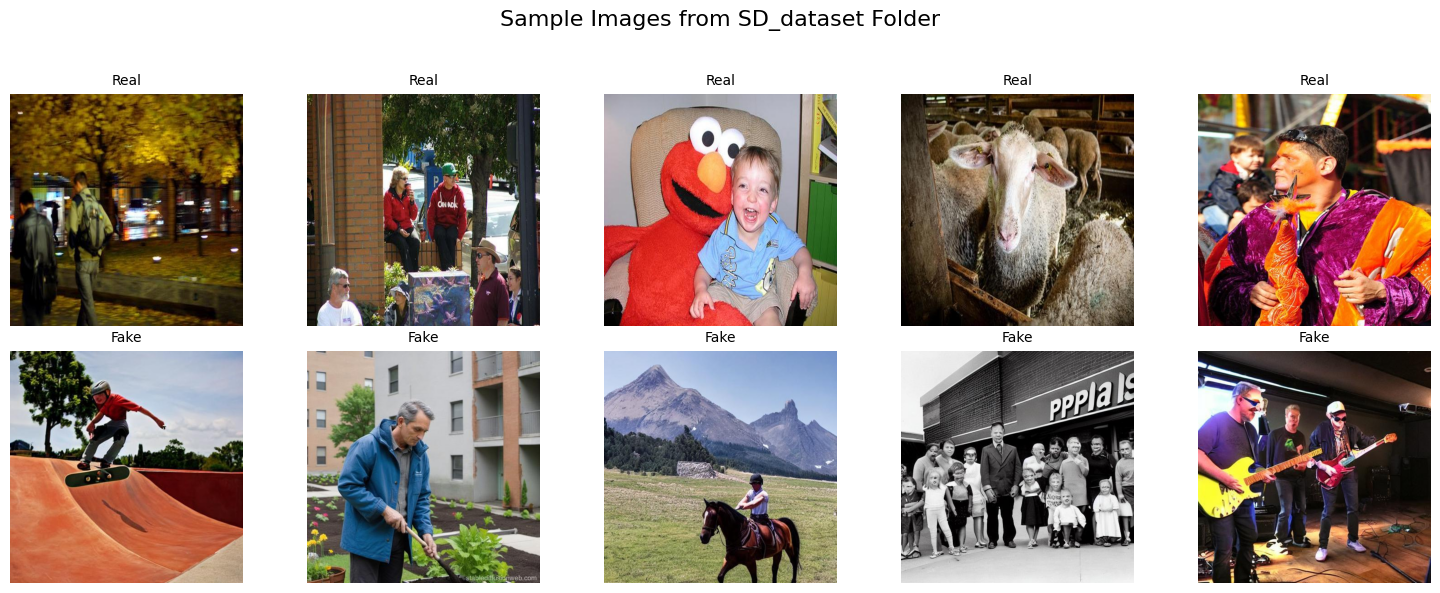

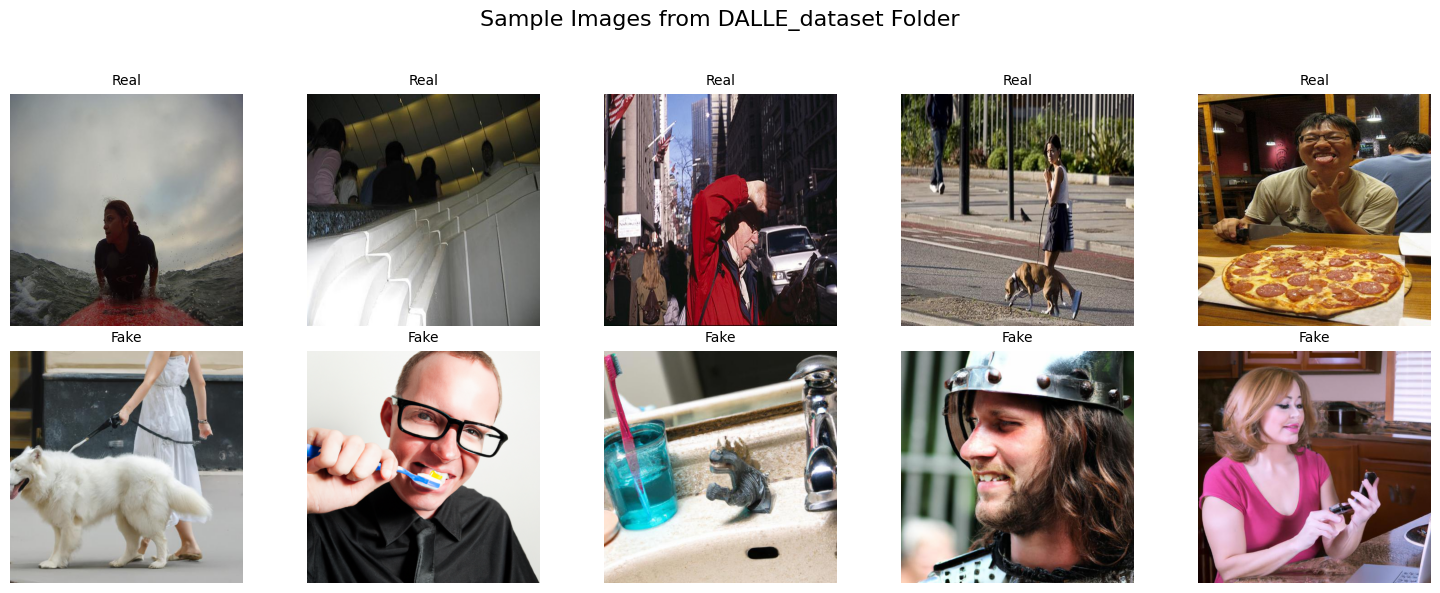

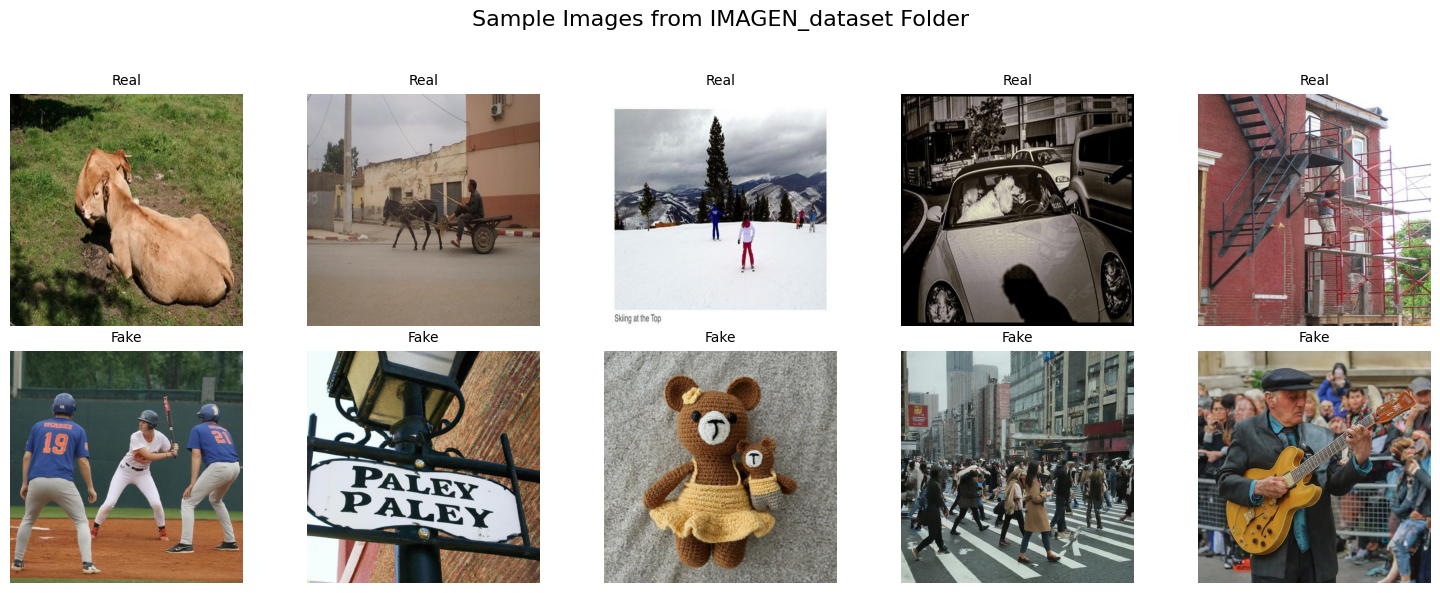

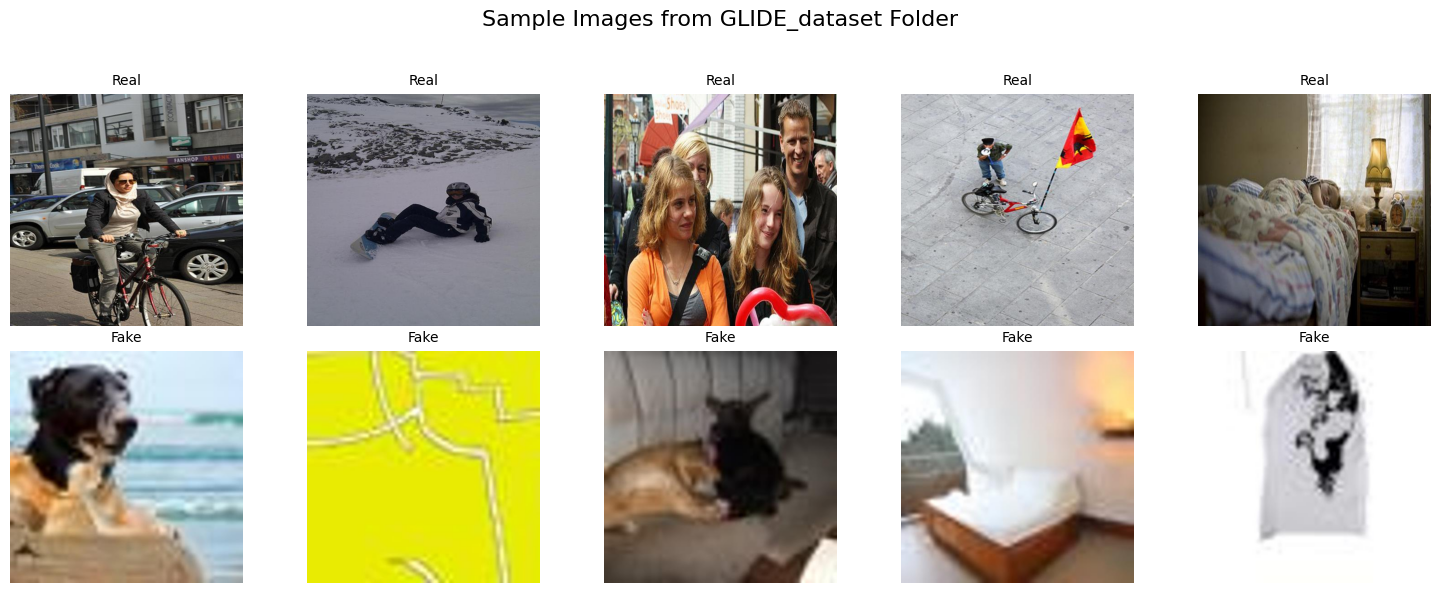

In [ ]:
# List of model folders to include
model_folders = [f for f in os.listdir(root_dir)
                 if os.path.isdir(os.path.join(root_dir, f)) and f.lower() != 'json_files']

# Loop through each model folder
for model_folder in model_folders:
    model_path = os.path.join(root_dir, model_folder)

    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    fig.suptitle(f'Sample Images from {model_folder} Folder', fontsize=16)

    for idx, category in enumerate(['real', 'fake']):
        category_path = os.path.join(model_path, category)
        if os.path.exists(category_path):
            image_files = [f for f in os.listdir(category_path) if os.path.isfile(os.path.join(category_path, f))]
            sample_images = random.sample(image_files, min(5, len(image_files)))  # Just in case there are fewer than 5

            for j, img_file in enumerate(sample_images):
                img_path = os.path.join(category_path, img_file)
                try:
                    img = Image.open(img_path)
                    axes[idx, j].imshow(img)
                    axes[idx, j].axis('off')
                    axes[idx, j].set_title(f"{category.capitalize()}", fontsize=10)
                except Exception as e:
                    print(f"Could not open image: {img_path}, Error: {e}")

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# 2. Data Preparation

**Initial Preparation:**

* Our first step was to work on `DeepGuardDB_v1`. This foundational dataset was edited using separate notebook. These initial scripts handled the crucial tasks of:
    * Extracting the images from the subfolders 'fake' and 'real'.
    * Consolidating these images into two primary categories: 'fake' and 'real'.
    * Standardizing all image file formats and systematically renaming files for consistency.

**Process in This Notebook:**

Once `OrganizedDeepGuardDB_V2` is available, the following steps are executed within this notebook but first **relevant libraries imports**:

1.  **Loading the Dataset:** The `OrganizedDeepGuardDB_V2` dataset, with its 'fake' and 'real' subfolders, is loaded.
2.  **Data Splitting:** The dataset is divided into training, validation, and test subsets.
3.  **Performance Configuration:** Data pipelines are optimized using caching (`.cache()`) and prefetching (`.prefetch()`) for efficient data handling during training.
4.  **Data Augmentation:** A defined pipeline of image augmentation transformations is applied to the training data.
5.  **Model-Specific Preprocessing:** Each model architecture (VGG16, ResNet50, EfficientNetB0) receives appropriately preprocessed input via its specific `preprocess_input` utility from `tf.keras.applications`.


<img src="https://drive.google.com/uc?export=download&id=1wndzFbVeWsRQLFFOqNE3mEUAfm2se8V3" alt="My Google Drive Image" width="800" />

## Import Libraries


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import load_img, img_to_array
import tensorflow.keras as config
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam, SGD
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

import os
import glob
import random

ds = '/content/drive/MyDrive/OrganizedDeepGuarDB_v2' #Already organized into two main folders

imageSize = (224, 224)
batchSize = 32 # Due to size of data set
seed = 123

## 2.1 Initial Data Loading and Splitting

This cell uses the convenient `tf.keras.utils.image_dataset_from_directory` function to load images directly from the specified directory (`ds`). It automatically:
* Infers class labels ('fake', 'real') from the subfolder names and sets `label_mode='binary'`.
* Resizes images to the defined `imageSize`.
* Creates batches according to `batchSize`.
* Splits the data into an initial 80% training set (`trainDs`) and a 20% validation set (`valDs`) using the `validation_split` and `subset` arguments.
* Stores the determined class names in `classNames`.

In [ ]:
print("\n--- Starting Data Loading and Preparation ---")
trainDs = tf.keras.utils.image_dataset_from_directory(
	ds, # dataset already decleared
	validation_split=0.2,
	subset="training",
	seed=seed,
	image_size=imageSize,
	batch_size=batchSize,
	label_mode='binary',
	class_names=['fake', 'real'] # Explicitly map 'fake' to 0, 'real' to 1
)

valDs = tf.keras.utils.image_dataset_from_directory(
	ds,
	validation_split=0.2,
	subset="validation",
	seed=seed,
	image_size=imageSize,
	batch_size=batchSize,
	label_mode='binary',
	class_names=['fake', 'real'] # Explicitly map 'fake' to 0, 'real' to 1
)

classNames = trainDs.class_names
print(f"\nLoaded datasets. Class names explicitly set to: {classNames}")
print(f"Label mode: 'binary' (0 = {classNames[0]}, 1 = {classNames[1]})")


--- Starting Data Loading and Preparation ---
Found 11995 files belonging to 2 classes.
Using 9596 files for training.
Found 11995 files belonging to 2 classes.
Using 2399 files for validation.

Loaded datasets. Class names explicitly set to: ['fake', 'real']
Label mode: 'binary' (0 = fake, 1 = real)


## 2.2. Creating The Final Test Set 80/10/10

Splits the initial 20% validation dataset (`valDs`) into the final 10% validation set and 10% test set, resulting in an 80/10/10 train/validation/test split.



In [ ]:
# Get the number of batches in the initial validation set
valBatches = tf.data.experimental.cardinality(valDs)

validationSize = valBatches // 2 # Calculate sizes for the final validation and test sets
testSize = valBatches - validationSize

print(f"Total batches in initial 20% validation set: {valBatches}")
print(f"Batches for final Validation set (10%): {validationSize}")
print(f"Batches for Test set (10%): {testSize}")

validationDs = valDs.take(validationSize) # Create the final validation set by taking the first half of batches
testDs = valDs.skip(validationSize) # Create the test set by skipping the first half and taking the rest

print(f"Training dataset batches: {tf.data.experimental.cardinality(trainDs)}")
print(f"Validation dataset batches: {tf.data.experimental.cardinality(validationDs)}")
print(f"Test dataset batches: {tf.data.experimental.cardinality(testDs)}")

del valDs

Total batches in initial 20% validation set: 75
Batches for final Validation set (10%): 37
Batches for Test set (10%): 38
Training dataset batches: 300
Validation dataset batches: 37
Test dataset batches: 38


## 2.3. Performance Optimization

Optimizes dataset loading performance by applying `.cache()`. This loads the datasets into memory after the first epoch, significantly speeding up subsequent epochs by avoiding repeated disk reads.


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE # AUTOTUNE allows TensorFlow to dynamically tune performance settings

# Cache the datasets in memory after the first read
# This avoids repeated disk I/O and speeds up training epochs,
# provided the datasets fit in available RAM.
trainDs = trainDs.cache()
validationDs = validationDs.cache()
testDs = testDs.cache()

print("Applied .cache() to train, validation, and test datasets for performance.")

# Source for performance optimization tips:
# https://www.tensorflow.org/tutorials/load_data/images#configure_the_dataset_for_performance

Applied .cache() to train, validation, and test datasets for performance.


## 2.4. Data Augmentation Pipeline

Defines a Keras Sequential model for data augmentation. This pipeline applies random geometric and color transformations to training images. Using this structure was helpful and efficient when appliying to different architectures

In [ ]:
dataAugmentationPipeline = keras.Sequential( # Defining a pipeline of random data augmentation
    [
        layers.RandomFlip("horizontal", seed=seed),
        layers.RandomRotation(0.1, seed=seed), # Max rotation approx. +/- 36 degrees
        layers.RandomZoom(0.1, seed=seed),      # Zoom in/out by up to 10%
        layers.RandomTranslation(height_factor=0.1, width_factor=0.1, seed=seed), # Shift by up to 10% vertically/horizontally
        layers.RandomBrightness(factor=0.15, seed=seed), # Adjust brightness +/- 15%
        layers.RandomContrast(factor=0.15, seed=seed),  # Adjust contrast +/- 15% (relative to 1.0)
    ],
)

## 2.5 Apply Augmentation to Training Dataset Pipeline



In [ ]:
def applyAugmentation(image, label):
    image = dataAugmentationPipeline(image, training=True)
    return image, label

# Apply the augmentation  only to trainDs
trainDs = trainDs.map(applyAugmentation, num_parallel_calls=AUTOTUNE)
#source https://www.tensorflow.org/tutorials/images/data_augmentation#two_options_to_use_the_keras_preprocessing_layers

print("Augmentation pipeline mapped to trainDs.")

Augmentation pipeline mapped to trainDs.


## 2.6. Visualization of Data Augmentation
Visualizes the effect of the data augmentation pipeline defined in the previous cell.


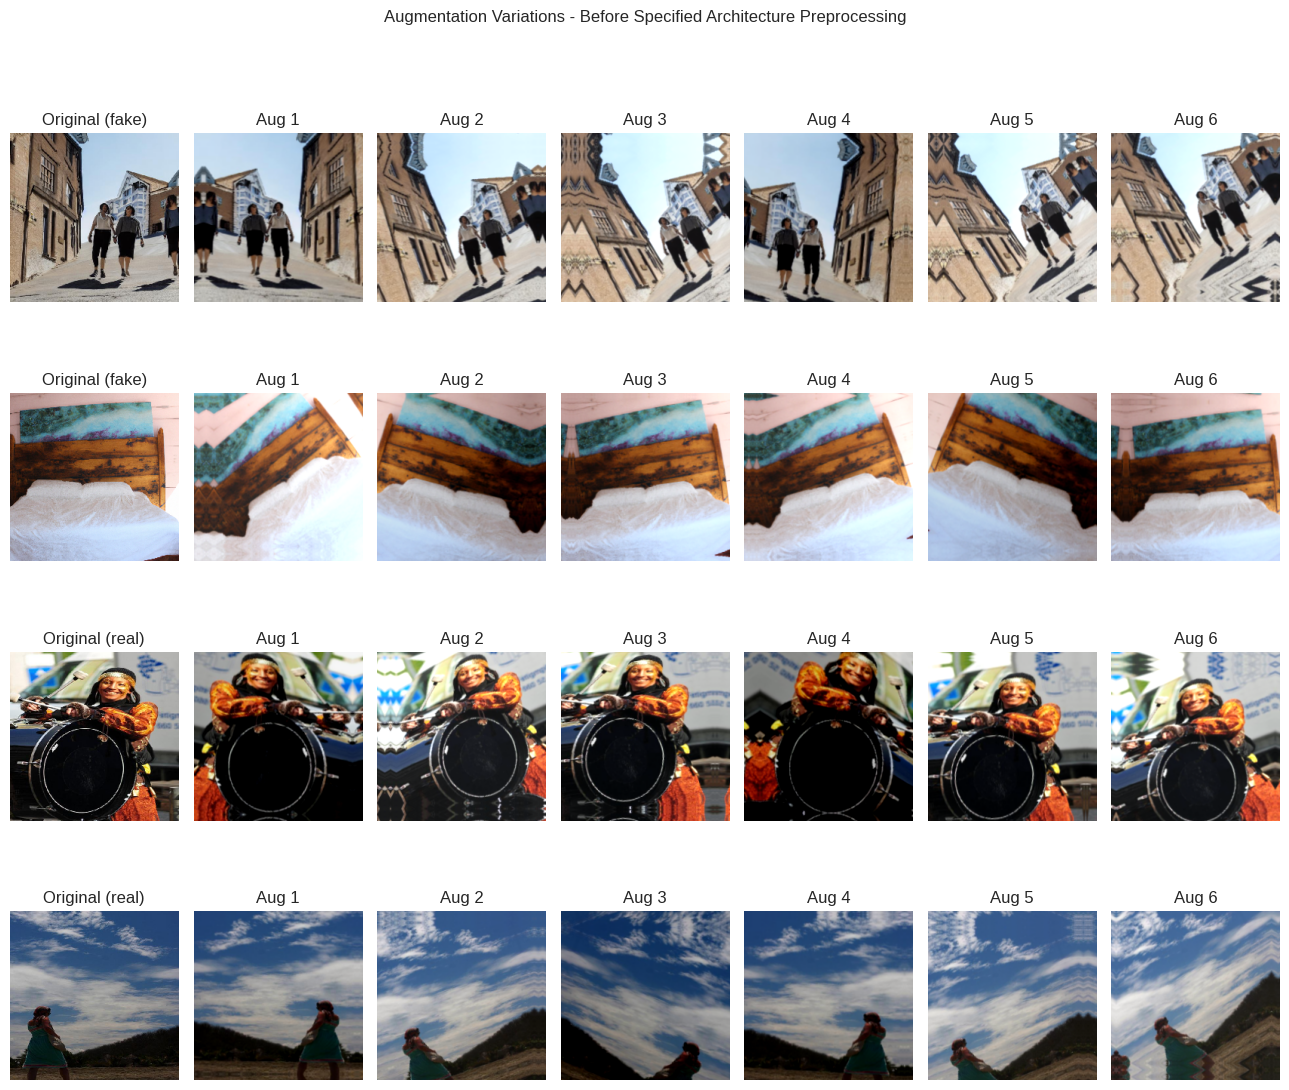

In [ ]:
# Define how many images from each class to show
num_fake_to_show = 2
num_real_to_show = 2
num_augmentations_per_image = 6 # Following our pipeline structure

# Get paths for each class
fake_image_paths = glob.glob(os.path.join(ds, 'fake', '*.*'))
real_image_paths = glob.glob(os.path.join(ds, 'real', '*.*'))

# Select random samples from each class
fake_samples = random.sample(fake_image_paths, num_fake_to_show)
real_samples = random.sample(real_image_paths, num_real_to_show)

# Combine and shuffle the samples
sampleImagePaths = fake_samples + real_samples

# Determine the actual number of images being displayed
num_original_images = len(sampleImagePaths)

# Set up the figure and axes for plotting grid
fig, axes = plt.subplots(nrows=num_original_images,
                          ncols=num_augmentations_per_image + 1,
                          figsize=(13, 8 + num_original_images * 1))

# Ensure axes is a 2D array even for a single row
if num_original_images == 1:
    axes = np.expand_dims(axes, 0)

# Loop through samples to load, display, and augment
for i, imagePath in enumerate(sampleImagePaths):

    relativePath = os.path.relpath(imagePath, ds)
    className = relativePath.split(os.path.sep)[0]

    img = tf.keras.utils.load_img(imagePath, target_size=imageSize)    # Load image
    imgArray = tf.keras.utils.img_to_array(img)
    imgBatch = tf.expand_dims(imgArray, 0)

    # Display original image
    axes[i, 0].imshow(imgArray.astype("uint8"))
    axes[i, 0].set_title(f"Original ({className})")
    axes[i, 0].axis("off")

    # Apply and display augmentations
    for j in range(num_augmentations_per_image):
        augmentedImageBatch = dataAugmentationPipeline(imgBatch, training=True)
        augmentedImage = augmentedImageBatch[0] #

        axes[i, j + 1].imshow(np.clip(augmentedImage, 0, 255).astype("uint8"))
        axes[i, j + 1].set_title(f"Aug {j+1}")
        axes[i, j + 1].axis("off")

plt.suptitle("Augmentation Variations - Before Specified Architecture Preprocessing")
plt.tight_layout(rect=[0, 0.02, 1, 0.97])
plt.show()

# 3. Modelling

This section focuses on building and evaluating Convolutional Neural Network (CNN) models for the task. We will explore and compare the performance of three distinct architectures:

* VGG16
* ResNet50
* EfficientNetB0

Each model custom head consists of the following layers in sequence:

1.  **GlobalAveragePooling2D:** Summarizes spatial features from the base model output.
2.  **Dense (128, ReLU, L2):** A standard fully connected layer with non-linearity (ReLU) and regularization (L2) to learn high-level combinations.
3.  **BatchNormalization:** Helps stabilize and speed up training.
4.  **Dropout (0.5):** Provides regularization by randomly dropping units during training.
5.  **Dense (1, Sigmoid):** The final output layer for binary classification, providing a probability score.

##### Extracting True Labels for Future Evaluations

In [ ]:
# This loop iterates through the test dataset batches and collects all the true labels into a single list.
y_true_common = []
# testDs should be the common test set defined in step 2,
for _, labels_batch in testDs:
    y_true_common.extend(labels_batch.numpy())  # Extend the list with labels from the current batch
y_true_common = np.array(y_true_common)# Convert the list of labels into a single numpy array to make it easier when plotting
print(f"Extracted {len(y_true_common)} common true labels.")

Extracted 1215 common true labels.


## 3.1. VGG16

### 3.1.1. Apply VGG16 Preprocessing

In [ ]:
from tensorflow.keras.applications.vgg16 import preprocess_input
# source: https://keras.io/api/applications/vgg/#vgg16-function
# VGG16 preprocess_input expects float32 input [0, 255], converts RGB->BGR, subtracts means
def applyPreprocessingVgg16(image, label):
    image = tf.cast(image, tf.float32)
    image = preprocess_input(image)
    return image, label

trainDsVgg16 = trainDs.map(applyPreprocessingVgg16, num_parallel_calls=AUTOTUNE) #Processing Training Dataset for VGG16
trainDsVgg16 = trainDsVgg16.prefetch(buffer_size=AUTOTUNE) # Apply prefetch

validationDsVgg16 = validationDs.map(applyPreprocessingVgg16, num_parallel_calls=AUTOTUNE) #Processing Validation Dataset for VGG16
validationDsVgg16 = validationDsVgg16.prefetch(buffer_size=AUTOTUNE) # Apply prefetch

testDsVgg16 = testDs.map(applyPreprocessingVgg16, num_parallel_calls=AUTOTUNE) #Processing Test Dataset for VGG16
testDsVgg16 = testDsVgg16.prefetch(buffer_size=AUTOTUNE) # Apply prefetch

print("\n--- Data Pipelines Prepared for VGG16 Model ---")


--- Data Pipelines Prepared for VGG16 Model ---


### 3.1.2. Load VGG16 Base Model & Freeze



In [ ]:
# Import VGG16 application
from tensorflow.keras.applications import VGG16

# Load VGG16 base with ImageNet weights, exclude top, define input shape
baseModelVgg16 = VGG16(
    weights='imagenet', # Load pretrained weights from ImageNet
    include_top=False, # Remove the original dense layers (classification head)
    input_shape=((224, 224, 3)  # Define the input image size (width, height, channels)
    )
  )

#Freezing all layers
for layer in baseModelVgg16.layers:
    layer.trainable = False

### 3.1.3 Add Custom Classification Head

In [ ]:
x = baseModelVgg16.output
x = config.layers.GlobalAveragePooling2D()(x)
x = config.layers.Dense(128, activation='relu',kernel_regularizer=keras.regularizers.l2(0.001))(x)
x = config.layers.BatchNormalization()(x)
x = config.layers.Dropout(0.6)(x)
predictions = config.layers.Dense(1, activation='sigmoid')(x)

modelVgg16 = config.Model(inputs=baseModelVgg16.input, outputs=predictions, name="VGG16")

print("Final VGG16-based model defined.")
modelVgg16.summary()

Final VGG16-based model defined.


Model: "VGG16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │           12

 Total params: 14,780,993 (56.39 MB)

 Trainable params: 66,049 (258.00 KB)

 Non-trainable params: 14,714,944 (56.13 MB)

### 3.1.4. Compile the model


In [ ]:
modelVgg16.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

print("VGG16 model compiled.")

VGG16 model compiled.


### 3.1.5. Train the Model


In [ ]:
epochs_vgg16 = 30

early_stopping_vgg16 = EarlyStopping(
    monitor='val_loss',
    min_delta = 0.005,     # Minimum change in the monitored quantity to qualify as an improvement
    patience=8,
    verbose=1,
    restore_best_weights=True
)
# Reduces learning rate by factor of 0.2 if 'val_loss' doesn't improve for 3 epochs
reduce_lr_vgg16 = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2, # Reduce LR to 20% of its current value
    patience=4, # Reduce LR after 3 epochs of no improvement
    min_lr=1e-6, #
    verbose=1
)
# historyVgg16 will be used for validation metrics
historyVgg16 = modelVgg16.fit(
    trainDsVgg16,
    epochs=epochs_vgg16,
    validation_data=validationDsVgg16,
    callbacks=[early_stopping_vgg16, reduce_lr_vgg16] # Pass both callbacks in a list
)

print(f"\nVGG16 training finished (potentially stopped early by EarlyStopping).")
actual_epochs_vgg16 = len(historyVgg16.history['loss'])
print(f"Actual epochs run: {actual_epochs_vgg16}")



Epoch 1/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 42s 114ms/step - accuracy: 0.6380 - loss: 0.9849 - val_accuracy: 0.7517 - val_loss: 0.7411 - learning_rate: 0.0010
Epoch 2/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 28s 90ms/step - accuracy: 0.7565 - loss: 0.6961 - val_accuracy: 0.7542 - val_loss: 0.6942 - learning_rate: 0.0010
Epoch 3/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 28s 90ms/step - accuracy: 0.7749 - loss: 0.6364 - val_accuracy: 0.7736 - val_loss: 0.6528 - learning_rate: 0.0010
Epoch 4/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 28s 90ms/step - accuracy: 0.7868 - loss: 0.6043 - val_accuracy: 0.7627 - val_loss: 0.6485 - learning_rate: 0.0010
Epoch 5/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 28s 90ms/step - accuracy: 0.7943 - loss: 0.5799 - val_accuracy: 0.7728 - val_loss: 0.6572 - learning_rate: 0.0010
Epoch 6/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 28s 90ms/step - accuracy: 0.7896 - loss: 0.5553 - val_accuracy: 0.7728 - val_loss: 0.6480 - learning_rate: 0.0010
Epoch 7/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 28s 90ms/step - accuracy: 0.7957 - 

### 3.1.6. Evaluate VGG16 on Test Set

In [ ]:
test_loss, test_acc = modelVgg16.evaluate(testDsVgg16, verbose=1) # verbose=1 shows progress bar

print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.7750 - loss: 0.5614

Test Loss: 0.5066
Test Accuracy: 0.7984


### 3.1.7. Classification Report



In [ ]:
y_pred_proba_vgg16 = modelVgg16.predict(testDsVgg16)

y_pred_vgg16 = (y_pred_proba_vgg16 > 0.5).astype("int32") # Probability > 0.5 is class 1 (real), else class 0 (fake).

if y_pred_vgg16.ndim > 1 and y_pred_vgg16.shape[1] == 1:
    y_pred_vgg16 = y_pred_vgg16.flatten()

# Print Classification Report using the common true labels
print("\nVGG16 Classification Report (Test Set):")
print(classification_report(y_true_common, y_pred_vgg16, target_names=classNames, zero_division=0))

38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step

VGG16 Classification Report (Test Set):
              precision    recall  f1-score   support

        fake       0.83      0.76      0.79       617
        real       0.77      0.84      0.80       598

    accuracy                           0.80      1215
   macro avg       0.80      0.80      0.80      1215
weighted avg       0.80      0.80      0.80      1215



## 3.2. ResNet50 Model



#### 3.2.1. Apply ResNet50 Preprocessing







In [ ]:
from tensorflow.keras.applications.resnet50 import preprocess_input

#source: https://keras.io/api/applications/resnet/
# ResNet50 specific preprocessing: converts RGB to BGR and normalizes pixel values, expects float32 [0, 255]

def applyPreprocessingResNet50(image, label):
    image = preprocess_input(image) # ResNet50 specific preprocessing
    return image, label

trainDsR50 = trainDs.map(applyPreprocessingResNet50, num_parallel_calls=AUTOTUNE) #Processing Training Dataset for ResNet50
trainDsR50 = trainDsR50.prefetch(buffer_size=AUTOTUNE)# Apply prefetch

validationDsR50 = validationDs.map(applyPreprocessingResNet50, num_parallel_calls=AUTOTUNE)# Processing Validation Dataset for ResNet50
validationDsR50 = validationDsR50.prefetch(buffer_size=AUTOTUNE) # Apply prefetch

testDsR50 = testDs.map(applyPreprocessingResNet50, num_parallel_calls=AUTOTUNE)# rocessing Testing Dataset for ResNet50
testDsR50 = testDsR50.prefetch(buffer_size=AUTOTUNE) # Apply prefetch

print("\n--- Data Pipelines Fully Prepared for ResNet50 Model ---")


--- Data Pipelines Fully Prepared for ResNet50 Model ---


### 3.2.2. Load the Pretrained ResNet50 Base Model

In [ ]:
# Loading the ResNet50 model
from tensorflow.keras.applications import ResNet50

baseModelR50 = ResNet50(
    weights='imagenet',      # Load pretrained weights from ImageNet
    include_top=False,       # Remove the original dense layers (classification head)
    input_shape=(224, 224, 3) # Define the input image size (width, height, channels)
)

# Freeze all layers in the base model
for layer in baseModelR50.layers:
  layer.trainable = False

### 3.2.3. Add Custom Classification Head




In [ ]:
x = baseModelR50.output # Get the output tensor from the base ResNet50 model
x = GlobalAveragePooling2D()(x) # Add Global Average Pooling to reduce spatial dimensions
x = Dense(128, activation='relu',kernel_regularizer=config.regularizers.l2(0.001) )(x)  # Add a Dense layer with ReLU activation and L2 regularization
x = BatchNormalization()(x) # Add Batch Normalization
x = Dropout(0.6)(x)  # Add Dropout for regularization (rate 0.5)
predictions_r50 = Dense(1, activation='sigmoid', name='predictions')(x) # Add the final output layer 1 unit, Sigmoid for binary classification

# Define the final model
modelR50 = Model(inputs=baseModelR50.input, outputs=predictions_r50, name="ResNet50")

modelR50.summary()

Model: "ResNet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_8[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,850,625 (90.98 MB)

 Trainable params: 262,657 (1.00 MB)

 Non-trainable params: 23,587,968 (89.98 MB)

### 3.2.4. Compile the Model


In [ ]:
modelR50.compile(
    optimizer='adam',             # Optimizer algorithm
    loss='binary_crossentropy',     # Loss function for binary classification
    metrics=['accuracy']            # Metric to monitor during training
)

### 3.2.5. Train the Model


In [ ]:
epochs_r50 = 30

early_stopping_r50 = EarlyStopping(
    monitor='val_loss',

    patience=8,
    verbose=1,
    restore_best_weights=True
)
# Reduces learning rate by factor of 0.2 if 'val_loss' doesn't improve for 3 epochs
reduce_lr_r50 = ReduceLROnPlateau(
    monitor='val_loss',
    min_delta = 0.005,     # Minimum change in the monitored quantity to qualify as an improvement
    factor=0.2, # Reduce LR to 20% of its current value
    patience=4, # Reduce LR after 3 epochs of no improvement
    min_lr=1e-6,
    verbose=1
)

# historyR50 will be used for validation metrics
historyR50 = modelR50.fit(
    trainDsR50, # Use ResNet50 specific dataset
    epochs=epochs_r50,
    validation_data=validationDsR50, # Use ResNet50 specific dataset
    callbacks=[early_stopping_r50, reduce_lr_r50]
)

print(f"\nResNet50 training finished (potentially stopped early).")
actual_epochs_r50 = len(historyR50.history['loss'])
print(f"Actual epochs run: {actual_epochs_r50}")

Epoch 1/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 41s 96ms/step - accuracy: 0.7336 - loss: 0.8560 - val_accuracy: 0.8015 - val_loss: 0.6383 - learning_rate: 0.0010
Epoch 2/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 24s 76ms/step - accuracy: 0.8057 - loss: 0.6174 - val_accuracy: 0.7492 - val_loss: 0.7718 - learning_rate: 0.0010
Epoch 3/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 23s 75ms/step - accuracy: 0.8199 - loss: 0.5602 - val_accuracy: 0.8100 - val_loss: 0.5600 - learning_rate: 0.0010
Epoch 4/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 24s 75ms/step - accuracy: 0.8310 - loss: 0.5233 - val_accuracy: 0.8209 - val_loss: 0.5492 - learning_rate: 0.0010
Epoch 5/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 24s 75ms/step - accuracy: 0.8333 - loss: 0.4895 - val_accuracy: 0.6385 - val_loss: 1.2575 - learning_rate: 0.0010
Epoch 6/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 23s 75ms/step - accuracy: 0.8369 - loss: 0.4898 - val_accuracy: 0.7948 - val_loss: 0.5920 - learning_rate: 0.0010
Epoch 7/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 23s 75ms/step - accuracy: 0.8402 - l

### 3.2.6. Validation accuracy

In [ ]:
test_loss, test_acc = modelR50.evaluate(testDsR50, verbose=1) # verbose=1 shows progress bar

print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - accuracy: 0.8236 - loss: 0.4244

Test Loss: 0.3899
Test Accuracy: 0.8494


### 3.2.7. Classification Report

Following the basic evaluation, detailed performance metrics were calculated using the model's predictions on the test set compared to the true labels.


In [ ]:
y_pred_proba_resnet50 = modelR50.predict(testDsR50) #Use the trained ResNet50 model to predict probabilities on the test dataset

y_pred_resnet50 = (y_pred_proba_resnet50 > 0.5).astype("int32") # Probability > 0.5 is class 1 (real), else class 0 (fake).
if y_pred_resnet50.ndim > 1 and y_pred_resnet50.shape[1] == 1:
    y_pred_resnet50 = y_pred_resnet50.flatten()

print(f"Generated and processed {len(y_pred_resnet50)} predictions for ResNet50.")
print(classification_report(y_true_common, y_pred_resnet50, target_names=classNames, zero_division=0))


38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step
Generated and processed 1215 predictions for ResNet50.
              precision    recall  f1-score   support

        fake       0.88      0.81      0.85       617
        real       0.82      0.89      0.85       598

    accuracy                           0.85      1215
   macro avg       0.85      0.85      0.85      1215
weighted avg       0.85      0.85      0.85      1215



## 3.3. EfficientNetB0


### 3.3.1. Apply EfficientNet - B0 Preprocessing and Finalize Data Pipelines




In [ ]:
from tensorflow.keras.applications.efficientnet import preprocess_input
# source: https://www.tensorflow.org/api_docs/python/tf/keras/applications/EfficientNetB0
def applyPreprocessingEfficientNetB0(image, label):
  #  Already provided float32 [0,255] but for best practices we keep the recomended preprocess_input
    image = tf.cast(image, tf.float32)
    image = preprocess_input(image)    # Apply EfficientNetB0 specific preprocessing
    return image, label

trainDsEffnetB0 = trainDs.map(applyPreprocessingEfficientNetB0, num_parallel_calls=AUTOTUNE)
trainDsEffnetB0 = trainDsEffnetB0.prefetch(buffer_size=AUTOTUNE)

validationDsEffnetB0= validationDs.map(applyPreprocessingEfficientNetB0, num_parallel_calls=AUTOTUNE)
validationDsEffnetB0 = validationDsEffnetB0.prefetch(buffer_size=AUTOTUNE)

testDsEffnetB0 = testDs.map(applyPreprocessingEfficientNetB0, num_parallel_calls=AUTOTUNE)
testDsEffnetB0 = testDsEffnetB0.prefetch(buffer_size=AUTOTUNE)

print("\n--- Data Pipelines Correctly Prepared for EfficientNetB0 Model ---")


--- Data Pipelines Correctly Prepared for EfficientNetB0 Model ---


### 3.3.2. Load EfficientNetV2B0 Base Model & Freeze



In [ ]:
from tensorflow.keras.applications import EfficientNetB0

baseModelEffnetB0 = EfficientNetB0(weights='imagenet',
                                 include_top=False,
                                 input_shape=(224, 224 ,3))

baseModelEffnetB0.trainable = False

### 3.3.3. Add Custom Classification Head

In [ ]:
x = baseModelEffnetB0.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001))(x)
x = BatchNormalization()(x)
x = Dropout(0.6)(x)
predictions = Dense(1, activation='sigmoid')(x)

# Define the final model using the direct Model import
modelEffnetB0 = Model(inputs=baseModelEffnetB0.input, outputs=predictions, name="EfficientNetB0")

print("Final EfficientNetB0-based model defined.")
#modelEffnetB0.summary() #

Final EfficientNetB0-based model defined.


### 3.3.4. Compile the model


In [ ]:

modelEffnetB0.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])


### 3.3.5. Train the Model


In [ ]:
epochs_effnetb0 = 30

early_stopping_effnetb0 = EarlyStopping(
    monitor='val_loss',
    min_delta=0.005,
    patience=8,
    verbose=1,
    restore_best_weights=True # Keep the best weights
)

reduce_lr_effnetb0 = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,  # Reduce LR to 20%
    patience=3,  # Reduce after 3 epochs of no improvement
    min_lr=1e-6, # Minimum learning rate
    verbose=1
)

historyEffnetB0 = modelEffnetB0.fit(
    trainDsEffnetB0, # Use datasets prepared in Cell EffNetB0
    epochs=epochs_effnetb0,
    validation_data=validationDsEffnetB0, # Use datasets prepared in Cell EffNetB0
    callbacks=[early_stopping_effnetb0, reduce_lr_effnetb0]
)

print(f"\nEfficientNetB0 training finished (potentially stopped early).")
actual_epochs_effnetb0 = len(historyEffnetB0.history['loss'])
print(f"Actual epochs run: {actual_epochs_effnetb0}")

Epoch 1/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 55s 115ms/step - accuracy: 0.6873 - loss: 0.9798 - val_accuracy: 0.7998 - val_loss: 0.6846 - learning_rate: 0.0010
Epoch 2/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 20s 65ms/step - accuracy: 0.7722 - loss: 0.7006 - val_accuracy: 0.7787 - val_loss: 0.6755 - learning_rate: 0.0010
Epoch 3/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 20s 65ms/step - accuracy: 0.7982 - loss: 0.6314 - val_accuracy: 0.7762 - val_loss: 0.6762 - learning_rate: 0.0010
Epoch 4/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 20s 65ms/step - accuracy: 0.8031 - loss: 0.5967 - val_accuracy: 0.7855 - val_loss: 0.6454 - learning_rate: 0.0010
Epoch 5/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 20s 65ms/step - accuracy: 0.8115 - loss: 0.5750 - val_accuracy: 0.7804 - val_loss: 0.6270 - learning_rate: 0.0010
Epoch 6/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 20s 65ms/step - accuracy: 0.8111 - loss: 0.5507 - val_accuracy: 0.8007 - val_loss: 0.5996 - learning_rate: 0.0010
Epoch 7/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 20s 65ms/step - accuracy: 0.8162 - 

### 3.3.6. Training Results Summary

In [ ]:
test_loss, test_acc = modelEffnetB0.evaluate(testDsEffnetB0, verbose=1) # verbose=1 shows progress bar

print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 115ms/step - accuracy: 0.8032 - loss: 0.5625

Test Loss: 0.5542
Test Accuracy: 0.8074


### 3.3.7. Classification Report

In [ ]:

y_pred_proba_efficientnetb0 = modelEffnetB0.predict(testDsEffnetB0) # Or your var name

y_pred_efficientnetb0 = (y_pred_proba_efficientnetb0 > 0.5).astype("int32")
if y_pred_efficientnetb0.ndim > 1 and y_pred_efficientnetb0.shape[1] == 1:
    y_pred_efficientnetb0 = y_pred_efficientnetb0.flatten()
print(f"Generated and processed {len(y_pred_efficientnetb0)} predictions for EfficientNetB0.")
print(classification_report(y_true_common, y_pred_efficientnetb0, target_names=classNames, zero_division=0))

38/38 ━━━━━━━━━━━━━━━━━━━━ 12s 175ms/step
Generated and processed 1215 predictions for EfficientNetB0.
              precision    recall  f1-score   support

        fake       0.82      0.79      0.81       617
        real       0.79      0.82      0.81       598

    accuracy                           0.81      1215
   macro avg       0.81      0.81      0.81      1215
weighted avg       0.81      0.81      0.81      1215



# 4. Evaluation

This section will be used to display all graphic results of each model, to therefore choose an option to optimize it.

## 4.1. Validation Accuracy and Loss

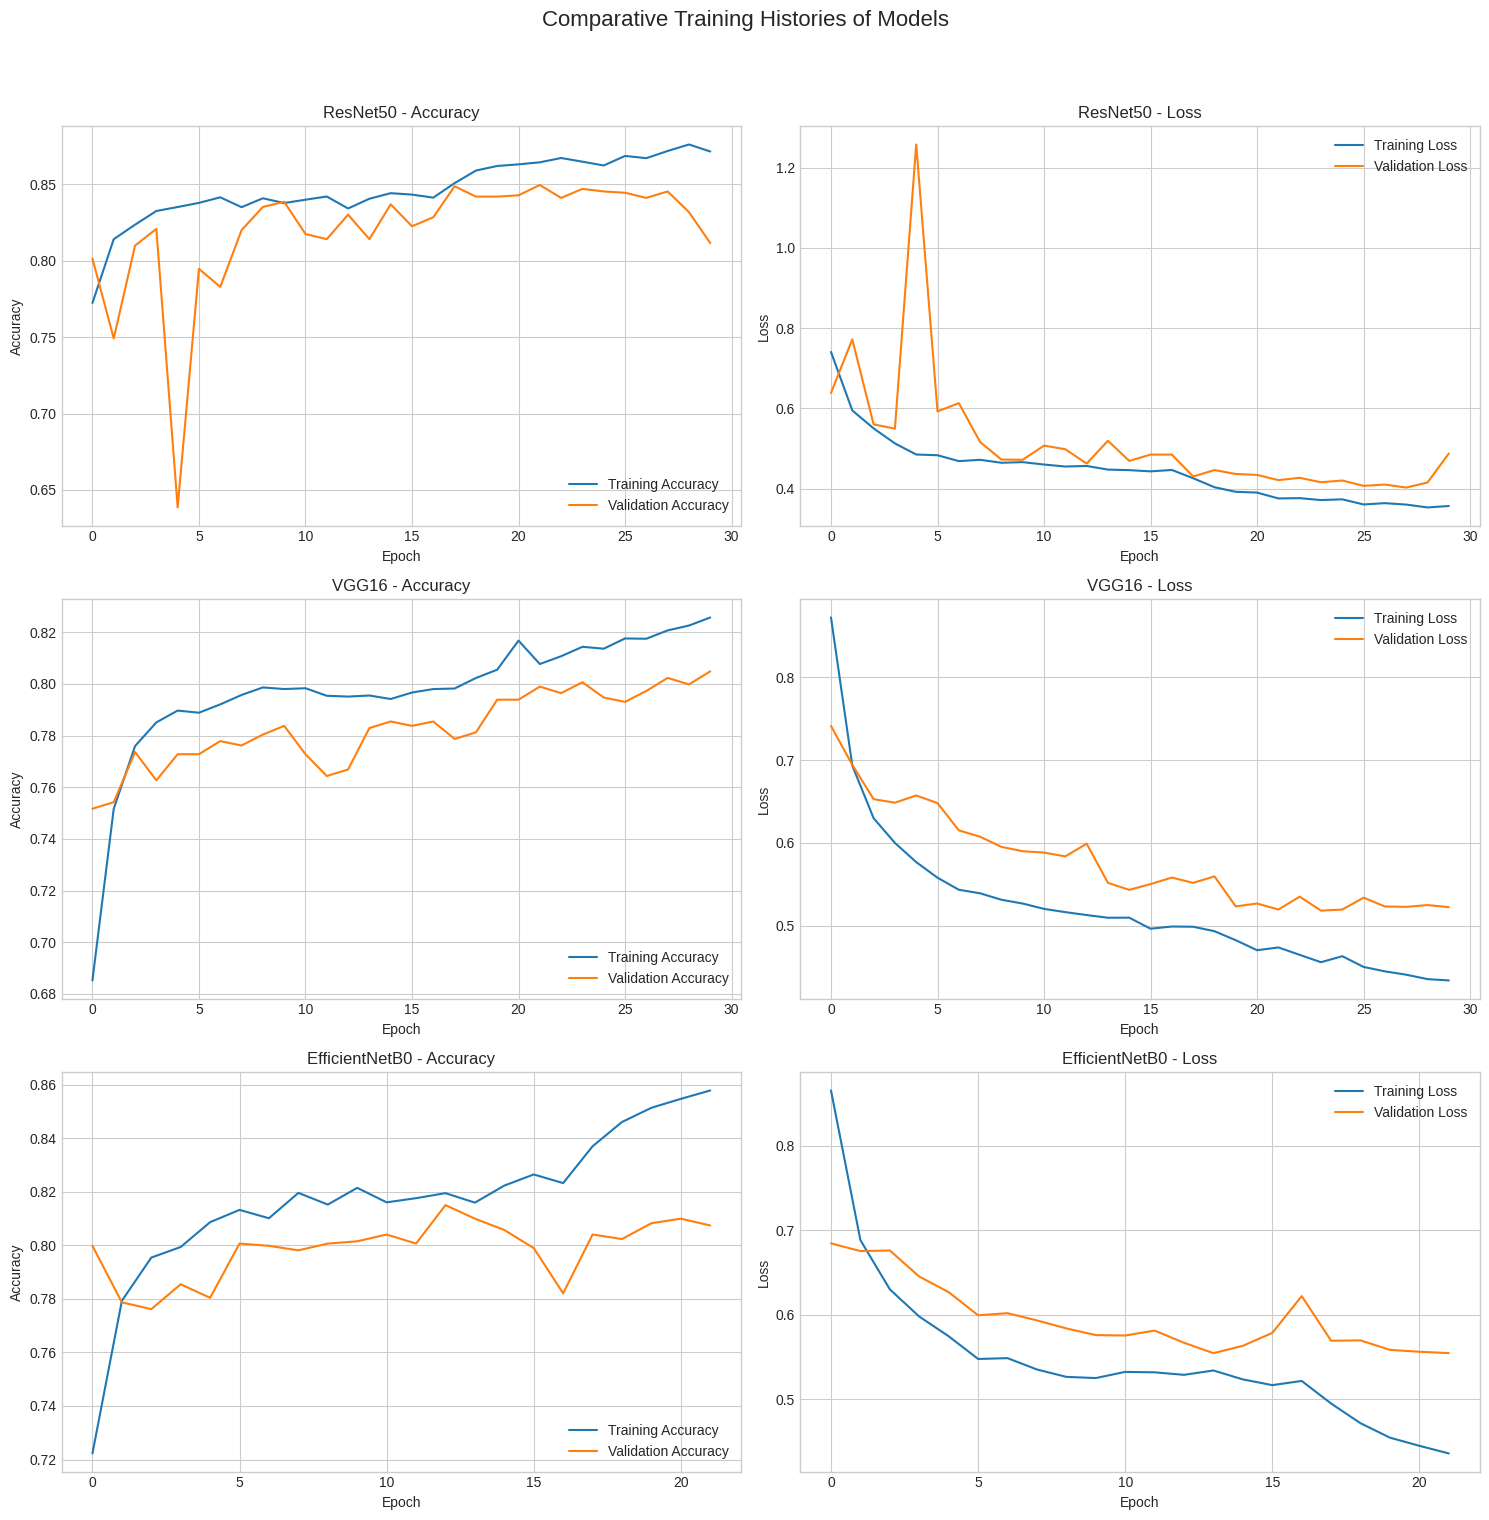

In [ ]:
# matplotlib and numpy is imported

# List of training history objects from your trained models
histories_to_plot = [historyR50, historyVgg16, historyEffnetB0]

model_names_for_plot = ["ResNet50", "VGG16", "EfficientNetB0"] # Names of models

# Determine the number of models to plot based on the provided history objects
num_models_to_plot = len(histories_to_plot)

# Create subplots: num_models rows, 2 columns (for accuracy and loss plots)
fig, axes = plt.subplots(nrows=num_models_to_plot, ncols=2, figsize=(15, 5 * num_models_to_plot))

# Adjust axes structure for consistent indexing if plotting only one model
if num_models_to_plot == 1:
    axes = np.expand_dims(axes, axis=0)

# Loop through each history object and plot its accuracy and loss curves
for i, history_obj in enumerate(histories_to_plot):
    model_name = model_names_for_plot[i]

    # Plot Training and Validation Accuracy, assuming accuracy and val_accuracy are in RAM
    axes[i, 0].plot(history_obj.history['accuracy'], label='Training Accuracy')
    axes[i, 0].plot(history_obj.history['val_accuracy'], label='Validation Accuracy')
    axes[i, 0].set_title(f'{model_name} - Accuracy')
    axes[i, 0].set_ylabel('Accuracy')
    axes[i, 0].set_xlabel('Epoch')
    axes[i, 0].legend(loc='lower right')
    axes[i, 0].grid(True)

    # Plot Training and Validation Loss, assuming loss and val_loss are in RAM
    axes[i, 1].plot(history_obj.history['loss'], label='Training Loss')
    axes[i, 1].plot(history_obj.history['val_loss'], label='Validation Loss')
    axes[i, 1].set_title(f'{model_name} - Loss')
    axes[i, 1].set_ylabel('Loss')
    axes[i, 1].set_xlabel('Epoch')
    axes[i, 1].legend(loc='upper right')
    axes[i, 1].grid(True)

# Add a main title for the entire figure
fig.suptitle("Comparative Training Histories of Models", fontsize=16, y=1.01)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()



## 4.2. Classification Report and Confusion Matrices

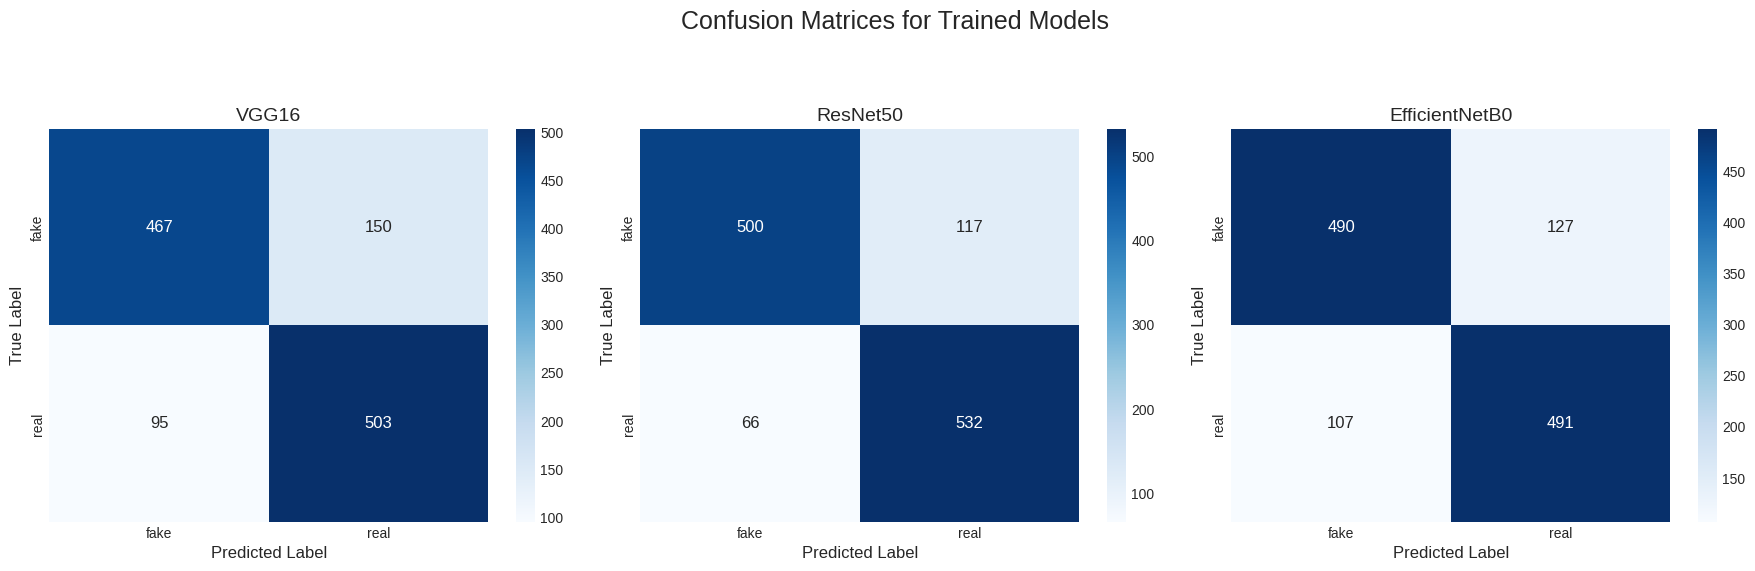

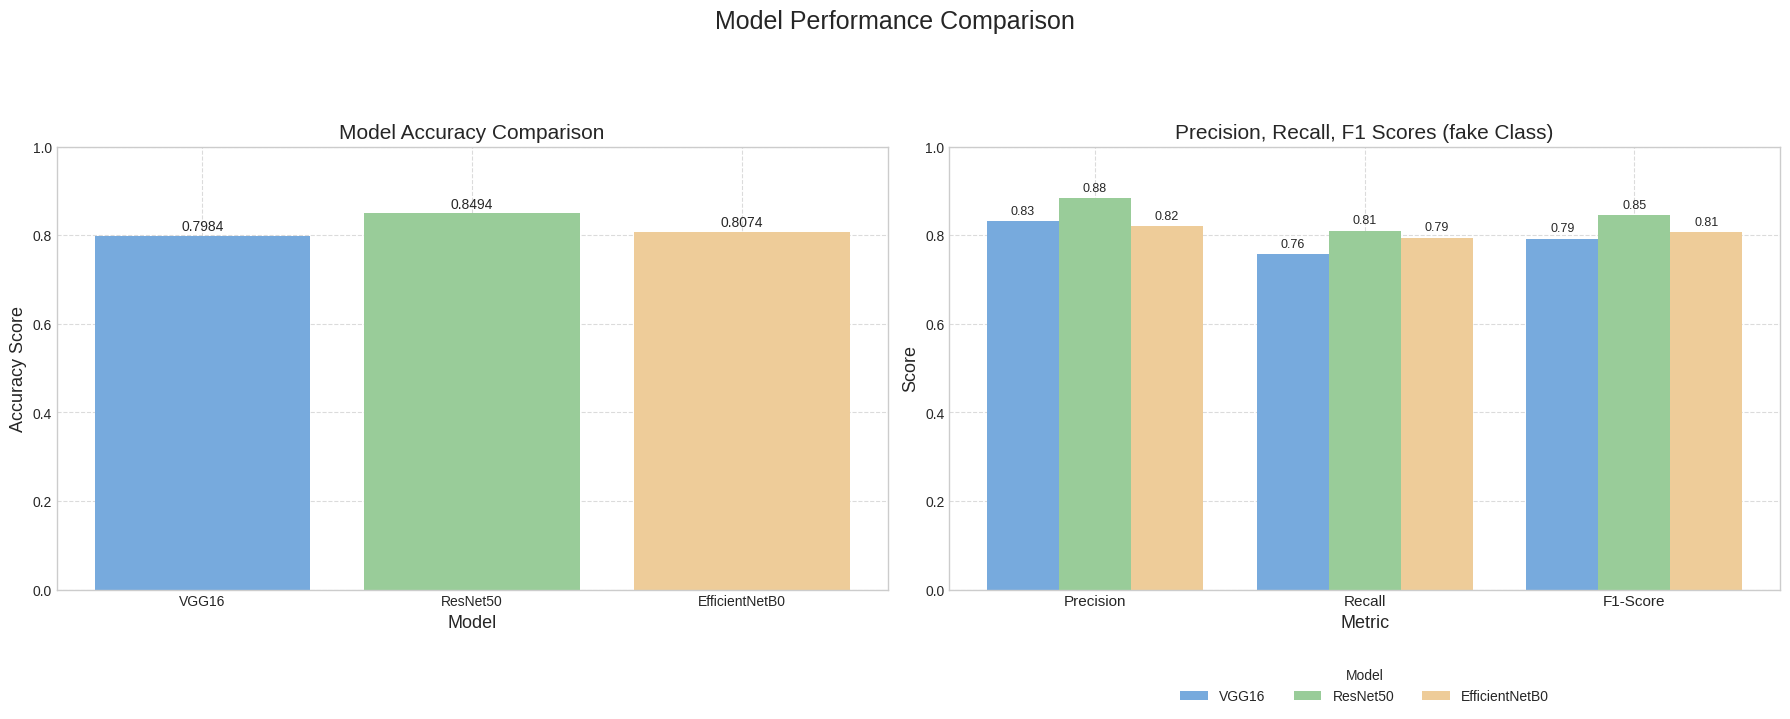

In [ ]:
# Matplotlib, sns and numpy already imported
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# True labels for the test dataset, extracted at 3. Modelling
y_true = y_true_common
predictions_list = [y_pred_vgg16, y_pred_resnet50, y_pred_efficientnetb0] # List of predicted labels from each trained model for plotting
model_names_for_metrics_plots = ['VGG16', 'ResNet50', 'EfficientNetB0'] # Order of predictions_list

num_models_cm = len(predictions_list) # Number of models to plot for
plt.figure(figsize=(6 * num_models_cm, 5.5)) # Create a figure, adjust size based on model count
plt.suptitle("Confusion Matrices for Trained Models", fontsize=18, y=1.03) # Main title for all CMs

# Loop through each model's predictions
for i, (model_name, y_pred_model) in enumerate(zip(model_names_for_metrics_plots, predictions_list)):
    plt.subplot(1, num_models_cm, i + 1) # Create a subplot for each model
    cm = confusion_matrix(y_true, y_pred_model) # Calculate confusion matrix

    # Display the confusion matrix as a heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=classNames, yticklabels=classNames,
                cbar=True, annot_kws={"size": 12})

    plt.title(f'{model_name}', fontsize=14) # Subplot title
    plt.ylabel('True Label', fontsize=12)    # Y-axis label
    plt.xlabel('Predicted Label', fontsize=12) # X-axis label

plt.tight_layout(rect=[0, 0, 1, 0.95]) # Adjust layout to prevent overlap
plt.show() # Display the confusion matrices figure

# Section 2: Performance Metrics Calculation
accuracies = []
precisions_target_class = []
recalls_target_class = []
f1_scores_target_class = []

# Define which class to focus on for P/R/F1
target_class_label = 0 # we are focusing on the fake class for the metrics
target_class_name = classNames[target_class_label]

# Calculate metrics for each model
for y_pred_model in predictions_list:
    accuracies.append(accuracy_score(y_true, y_pred_model)) # Overall accuracy
    # Precision, Recall, F1 for the specifically chosen 'target_class_label'
    precisions_target_class.append(precision_score(y_true, y_pred_model, pos_label=target_class_label, zero_division=0))
    recalls_target_class.append(recall_score(y_true, y_pred_model, pos_label=target_class_label, zero_division=0))
    f1_scores_target_class.append(f1_score(y_true, y_pred_model, pos_label=target_class_label, zero_division=0))

# Section 3: Performance Metrics Comparison Plots
plt.style.use('seaborn-v0_8-whitegrid') # Apply a seaborn style for better aesthetics
fig_metrics, axes_metrics = plt.subplots(1, 2, figsize=(18, 7.5)) # Create a figure with 1 row, 2 subplots
fig_metrics.suptitle("Model Performance Comparison", fontsize=18, y=1.03) # Main title for comparison plots

# Define a color palette for the models
model_plot_colors = ['#77AADD', '#99CC99', '#EECC99', '#AAAAAA', '#CCCCCC']

# Plot 1: Model Accuracy Comparison Bar Chart
axes_metrics[0].bar(model_names_for_metrics_plots, accuracies, color=model_plot_colors[:len(model_names_for_metrics_plots)])
axes_metrics[0].set_title('Model Accuracy Comparison', fontsize=15) # Title for this subplot
axes_metrics[0].set_ylabel('Accuracy Score', fontsize=13)        # Y-axis label
axes_metrics[0].set_xlabel('Model', fontsize=13)                 # X-axis label
min_acc_display = min(accuracies) if accuracies else 0.7         # Dynamic Y-axis lower limit
max_acc_display = max(accuracies) if accuracies else 1.0         # Dynamic Y-axis upper limit
axes_metrics[0].set_ylim(min(0.0, min_acc_display - 0.05) , max(1.0, max_acc_display + 0.03)) # Apply Y-axis limits
for i, v_acc_val in enumerate(accuracies):                       # Add accuracy values on top of bars
    axes_metrics[0].text(i, v_acc_val + 0.005, f"{v_acc_val:.4f}", ha='center', va='bottom', fontsize=10)
axes_metrics[0].grid(True, linestyle='--', alpha=0.7)            # Add a grid for readability

# Plot 2: Comparison of Precision, Recall, and F1-Score
metrics_categories_plot = ['Precision', 'Recall', 'F1-Score']  # Categories for X-axis
num_metrics_categories = len(metrics_categories_plot)           # Number of metric categories
num_models_plotting = len(model_names_for_metrics_plots)      # Number of models being compared
bar_width_for_grouped = 0.8 / num_models_plotting             # Calculate width for each bar in a group
x_indices_for_metrics = np.arange(num_metrics_categories)     # X-axis positions for the metric groups

# Loop through each model to plot its Precision, Recall, F1 bars
for i, model_name_iter_plot in enumerate(model_names_for_metrics_plots):
    model_scores_plot = [precisions_target_class[i], recalls_target_class[i], f1_scores_target_class[i]] # Scores for current model
    # Calculate position for each bar within its group
    bar_positions_plot = x_indices_for_metrics + (i - (num_models_plotting - 1) / 2.0) * bar_width_for_grouped

    rects = axes_metrics[1].bar(bar_positions_plot, model_scores_plot, bar_width_for_grouped,
                                label=model_name_iter_plot, color=model_plot_colors[i % len(model_plot_colors)])
    for rect in rects: # Add text labels on top of each bar
        height = rect.get_height()
        axes_metrics[1].annotate(f'{height:.2f}',
                                 xy=(rect.get_x() + rect.get_width() / 2, height),
                                 xytext=(0, 3), textcoords="offset points",
                                 ha='center', va='bottom', fontsize=9)

axes_metrics[1].set_title(f"Precision, Recall, F1 Scores ({target_class_name} Class)", fontsize=15) # Subplot title
axes_metrics[1].set_ylabel('Score', fontsize=13)                # Y-axis label
axes_metrics[1].set_xlabel('Metric', fontsize=13)               # X-axis label
axes_metrics[1].set_xticks(x_indices_for_metrics)               # Set X-tick positions
axes_metrics[1].set_xticklabels(metrics_categories_plot, fontsize=11) # Set X-tick labels
max_prf_metric_val = 0                                          # For dynamic Y-axis scaling
if precisions_target_class: max_prf_metric_val = max(max_prf_metric_val, max(precisions_target_class))
if recalls_target_class: max_prf_metric_val = max(max_prf_metric_val, max(recalls_target_class))
if f1_scores_target_class: max_prf_metric_val = max(max_prf_metric_val, max(f1_scores_target_class))
axes_metrics[1].set_ylim(0, max(1.0, max_prf_metric_val + 0.1) if max_prf_metric_val > 0 else 1.0) # Apply Y-axis limits
axes_metrics[1].legend(title="Model", fontsize='medium', title_fontsize='medium',
                       loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=num_models_plotting) # Position legend below plot
axes_metrics[1].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout(rect=[0, 0.05, 1, 0.95]) # Adjust overall layout to prevent overlap
plt.show()
